CRAIG HILBY cxh170004 <br>
Learners.py<br>
---------<br>
Licensing Information:  You are free to use or extend these projects for<br>
personal and educational purposes provided that (1) you do not distribute<br>
or publish solutions, (2) you retain this notice, and (3) you provide clear<br>
attribution to UT Dallas, including a link to http://cs.utdallas.edu.<br>
<br>
This file is part of Homework for CS6375: Machine Learning.<br>
Gautam Kunapuli (gautam.kunapuli@utdallas.edu)<br>
Sriraam Natarajan (sriraam.natarajan@utdallas.edu),<br>
Anjum Chida (anjum.chida@utdallas.edu)<br>
<br>
<br>
INSTRUCTIONS:<br>
------------<br>
1. This file contains a skeleton for implementing the ID3 algorithm for<br>
Decision Trees. Insert your code into the various functions that have the<br>
comment "INSERT YOUR CODE HERE".<br>
<br>
2. Do NOT modify the classes or functions that have the comment "DO NOT<br>
MODIFY THIS FUNCTION".<br>
<br>
3. Do not modify the function headers for ANY of the functions.<br>
<br>
4. You may add any other helper functions you feel you may need to print,<br>
visualize, test, or save the data and results. However, you MAY NOT utilize<br>
the package scikit-learn OR ANY OTHER machine learning package in THIS file.

In [476]:
import numpy as np
import os
import graphviz
import math
import matplotlib.pyplot as plt 

In [477]:
def partition(x):
    """
    Partition the column vector x into subsets indexed by its unique values (v1, ... vk)
    Returns a dictionary of the form
    { v1: indices of x == v1,
      v2: indices of x == v2,
      ...
      vk: indices of x == vk }, where [v1, ... vk] are all the unique values in the vector z.
    """

    indices = {}
    for value in range(len(x)):
        indices[x[value]] = indices.get(x[value], []) + [value]
    return indices
    raise Exception('Function not yet implemented!')

Test case

In [478]:
partition([1,5,3,1,7,5,3,5,3,2])

{1: [0, 3], 5: [1, 5, 7], 3: [2, 6, 8], 7: [4], 2: [9]}

In [479]:
def entropy(y):
    """
    Compute the entropy of a vector y by considering the counts of the unique values (v1, ... vk), in z
    Returns the entropy of z: H(z) = p(z=v1) log2(p(z=v1)) + ... + p(z=vk) log2(p(z=vk))
    """

    values, count = np.unique(y, return_counts="True")
    h = 0
    for c in count:
        h += ((c/len(y))* math.log(c/len(y), 2))
    return -h
    raise Exception('Function not yet implemented!')

Test case

In [480]:
entropy([1,0,1,1,0,1,0,1,1])

0.9182958340544896

In [481]:
def mutual_information(x, y):
    """
    Compute the mutual information between a data column (x) and the labels (y). The data column is a single attribute
    over all the examples (n x 1). Mutual information is the difference between the entropy BEFORE the split set, and
    the weighted-average entropy of EACH possible split.
    Returns the mutual information: I(x, y) = H(y) - H(y | x)
    """

    e_y = entropy(y)
    d = {}
    values, count = np.unique(x, return_counts="True")
    for v in values:
        new_y1 = []
        new_y2 = []
        for i in range(len(y)):
            if (x[i] == v):
                new_y1.append(y[i])
            else:
                new_y2.append(y[i])
        d[v] = e_y - (((len(new_y1)/len(y))*entropy(new_y1)) + ((len(new_y2)/len(y))*entropy(new_y2)))
    return d
    raise Exception('Function not yet implemented!')

In [482]:
def info_gain_specified_value(x, v, y):
    d = mutual_information(x,y)
    return d.get(v)

Test Cases

In [483]:
m1 = ['a','a','b','c','a','b','c','a','b','c']
m2 = [1,0,1,0,0,0,1,1,1,0]
mutual_information(m1, m2)

{'a': 0.0, 'b': 0.034851554559677034, 'c': 0.034851554559677034}

In [484]:
m1 = ['a','a','b','c','a','b','c','a','b','c']
m2 = [1,0,1,0,0,0,1,1,1,0]
info_gain_specified_value(m1, 'b', m2)

0.034851554559677034

In [485]:
def id3(x, y, attribute_value_pairs=None, depth=0, max_depth=5):
    """
    Implements the classical ID3 algorithm given training data (x), training labels (y) and an array of
    attribute-value pairs to consider. This is a recursive algorithm that depends on three termination conditions
        1. If the entire set of labels (y) is pure (all y = only 0 or only 1), then return that label
        2. If the set of attribute-value pairs is empty (there is nothing to split on), then return the most common
           value of y (majority label)
        3. If the max_depth is reached (pre-pruning bias), then return the most common value of y (majority label)
    Otherwise the algorithm selects the next best attribute-value pair using INFORMATION GAIN as the splitting criterion
    and partitions the data set based on the values of that attribute before the next recursive call to ID3.
    The tree we learn is a BINARY tree, which means that every node has only two branches. The splitting criterion has
    to be chosen from among all possible attribute-value pairs. That is, for a problem with two features/attributes x1
    (taking values a, b, c) and x2 (taking values d, e), the initial attribute value pair list is a list of all pairs of
    attributes with their corresponding values:
    [(x1, a),
     (x1, b),
     (x1, c),
     (x2, d),
     (x2, e)]
     If we select (x2, d) as the best attribute-value pair, then the new decision node becomes: [ (x2 == d)? ] and
     the attribute-value pair (x2, d) is removed from the list of attribute_value_pairs.
    The tree is stored as a nested dictionary, where each entry is of the form
                    (attribute_index, attribute_value, True/False): subtree
    * The (attribute_index, attribute_value) determines the splitting criterion of the current node. For example, (4, 2)
    indicates that we test if (x4 == 2) at the current node.
    * The subtree itself can be nested dictionary, or a single label (leaf node).
    * Leaf nodes are (majority) class labels
    Returns a decision tree represented as a nested dictionary, for example
    {(4, 1, False):
        {(0, 1, False):
            {(1, 1, False): 1,
             (1, 1, True): 0},
         (0, 1, True):
            {(1, 1, False): 0,
             (1, 1, True): 1}},
     (4, 1, True): 1}
    """

    x = np.asarray(x)
    y = np.asarray(y)
    
    #populate attribute_value_pairs
    if depth == 0:
        attribute_value_pairs = []
        for attr in range(len(x[0])):
            for val in np.unique(np.transpose(x[:,attr])):
                pair = (attr, val)
                attribute_value_pairs.append(pair)
    
    #checks if entire set of labels(y) is pure
    if len(np.unique(y)) == 1:
        return y[0]
    
    #checks if attr val pairs are empty, or if at max depth. In both cases, return majority label
    if (not attribute_value_pairs) or depth == max_depth or len(x) == 0:
        values, counts = np.unique(y, return_counts = "True")
        if counts.size == 0:
            return 0
        index_max = np.argmax(counts)
        return values[index_max]
    
    d = {}
    max_ig = -1
    dec_node = (-1,-1)

    for pair in attribute_value_pairs:
        attr_vec = np.transpose(x)[pair[0]]
        info_gain = mutual_information(attr_vec, y).get(pair[1])
        if info_gain is None:
            continue
        if info_gain > max_ig:
            max_ig = info_gain
            dec_node = pair
    if dec_node == (-1,-1):
        values, counts = np.unique(y, return_counts = "True")
        return values[np.argmax(counts)]
    else:
        attribute_value_pairs.remove(dec_node)
    
    x_new1 = []
    x_new2 = []
    y_new1 = []
    y_new2 = []
    for i in range(len(x)):
        if x[i][dec_node[0]] == dec_node[1]:
            x_new1.append(x[i])
            y_new1.append(y[i])
        else:
            x_new2.append(x[i])
            y_new2.append(y[i])
            
    
    d[(dec_node[0], dec_node[1], False)] = id3(x_new2, y_new2, attribute_value_pairs, depth+1, max_depth)
    d[(dec_node[0], dec_node[1], True)] = id3(x_new1, y_new1, attribute_value_pairs, depth+1, max_depth)
    return d
        
    raise Exception('Function not yet implemented!')

Test case

In [486]:
x = [[0,0,0],[1,2,2],[2,0,1],[0,1,1],[2,2,2],[1,0,1],[1,1,0],[3,2,1],[1,3,3],[0,0,1]]
y = [0,0,1,1,1,0,0,1,1,1]
id3(x, y)

{(2, 0, False): {(0, 1, False): 1,
  (0, 1, True): {(1, 3, False): 0, (1, 3, True): 1}},
 (2, 0, True): 0}

In [487]:
def predict_example(x, tree):
    """
    Predicts the classification label for a single example x using tree by recursively descending the tree until
    a label/leaf node is reached.
    Returns the predicted label of x according to tree
    """

    root = list(tree.keys())
    attr = root[0][0]
    val = root[0][1]
    if x[attr] == val:
        subTree = tree.get((attr, val, True))
    else:
        subTree = tree.get((attr, val, False))
    
    if subTree == 0 or subTree == 1:
        return subTree
    else:
        return predict_example(x, subTree)
        
    raise Exception('Function not yet implemented!')

In [488]:
x = [[0,0,0],[1,2,2],[2,0,1],[0,1,1],[2,2,2],[1,0,1],[1,1,0],[3,2,1],[1,3,3],[0,0,1]]
y = [0,0,1,1,1,0,0,1,1,1]
predict_example([1,2,1],id3(x, y))

0

In [489]:
def compute_error(y_true, y_pred):
    """
    Computes the average error between the true labels (y_true) and the predicted labels (y_pred)
    Returns the error = (1/n) * sum(y_true != y_pred)
    """

    n = len(y_true)
    sum = 0
    for i in range(n):
        if (y_true[i] != y_pred[i]):
            sum += 1
            
    return (1/n) * sum
    raise Exception('Function not yet implemented!')

In [490]:
def pretty_print(tree, depth=0):
    """
    Pretty prints the decision tree to the console. Use print(tree) to print the raw nested dictionary representation
    """
    if depth == 0:
        print('TREE')
    for index, split_criterion in enumerate(tree):
        sub_trees = tree[split_criterion]

        # Print the current node: split criterion
        print('|\t' * depth, end='')
        print('+-- [SPLIT: x{0} = {1} {2}]'.format(split_criterion[0], split_criterion[1], split_criterion[2]))

        # Print the children
        if type(sub_trees) is dict:
            pretty_print(sub_trees, depth + 1)
        else:
            print('|\t' * (depth + 1), end='')
            print('+-- [LABEL = {0}]'.format(sub_trees))

In [491]:
def render_dot_file(dot_string, save_file, image_format='png'):
    """
    Uses GraphViz to render a dot file. The dot file can be generated using
        * sklearn.tree.export_graphviz()' for decision trees produced by scikit-learn
        * to_graphviz() (function is in this file) for decision trees produced by  your code.
    """
    if type(dot_string).__name__ != 'str':
        raise TypeError('visualize() requires a string representation of a decision tree.\nUse tree.export_graphviz()'
                        'for decision trees produced by scikit-learn and to_graphviz() for decision trees produced by'
                        'your code.\n')

    # Set path to your GraphViz executable here
    os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
    graph = graphviz.Source(dot_string)
    graph.format = image_format
    graph.render(save_file, view=True)

In [492]:
def to_graphviz(tree, dot_string='', uid=-1, depth=0):
    """
    Converts a tree to DOT format for use with visualize/GraphViz
    """
    uid += 1       # Running index of node ids across recursion
    node_id = uid  # Node id of this node
    if depth == 0:
        dot_string += 'digraph TREE {\n'
    for split_criterion in tree:
        sub_trees = tree[split_criterion]
        attribute_index = split_criterion[0]
        attribute_value = split_criterion[1]
        split_decision = split_criterion[2]
        if not split_decision:
            # Alphabetically, False comes first
            dot_string += '    node{0} [label="x{1} = {2}?"];\n'.format(node_id, attribute_index, attribute_value)
        if type(sub_trees) is dict:
            if not split_decision:
                dot_string, right_child, uid = to_graphviz(sub_trees, dot_string=dot_string, uid=uid, depth=depth + 1)
                dot_string += '    node{0} -> node{1} [label="False"];\n'.format(node_id, right_child)
            else:
                dot_string, left_child, uid = to_graphviz(sub_trees, dot_string=dot_string, uid=uid, depth=depth + 1)
                dot_string += '    node{0} -> node{1} [label="True"];\n'.format(node_id, left_child)
        else:
            uid += 1
            dot_string += '    node{0} [label="y = {1}"];\n'.format(uid, sub_trees)
            if not split_decision:
                dot_string += '    node{0} -> node{1} [label="False"];\n'.format(node_id, uid)
            else:
                dot_string += '    node{0} -> node{1} [label="True"];\n'.format(node_id, uid)
    if depth == 0:
        dot_string += '}\n'
        return dot_string
    else:
        return dot_string, node_id, uid

In [528]:
if __name__ == '__main__':
    # Load the training data
    M = np.genfromtxt('./monks-1.train', missing_values=0, skip_header=0, delimiter=',', dtype=int)
    ytrn = M[:, 0]
    Xtrn = M[:, 1:]

    # Load the test data
    M = np.genfromtxt('./monks-1.test', missing_values=0, skip_header=0, delimiter=',', dtype=int)
    ytst = M[:, 0]
    Xtst = M[:, 1:]

    # Learn a decision tree of depth 3
    decision_tree = id3(Xtrn, ytrn, max_depth=3)

    # Pretty print it to console
    pretty_print(decision_tree)

    # Visualize the tree and save it as a PNG image
    dot_str = to_graphviz(decision_tree)
    render_dot_file(dot_str, './my_learned_tree')

    # Compute the test error
    y_pred = [predict_example(x, decision_tree) for x in Xtst]
    tst_err = compute_error(ytst, y_pred)

    print('Test Error = {0:4.2f}%.'.format(tst_err * 100))

TREE
+-- [SPLIT: x4 = 1 False]
|	+-- [SPLIT: x0 = 1 False]
|	|	+-- [SPLIT: x1 = 1 False]
|	|	|	+-- [LABEL = 1]
|	|	+-- [SPLIT: x1 = 1 True]
|	|	|	+-- [LABEL = 0]
|	+-- [SPLIT: x0 = 1 True]
|	|	+-- [SPLIT: x1 = 3 False]
|	|	|	+-- [LABEL = 0]
|	|	+-- [SPLIT: x1 = 3 True]
|	|	|	+-- [LABEL = 0]
+-- [SPLIT: x4 = 1 True]
|	+-- [LABEL = 1]
Test Error = 25.00%.


# Part B 

Monks-1 Data Set

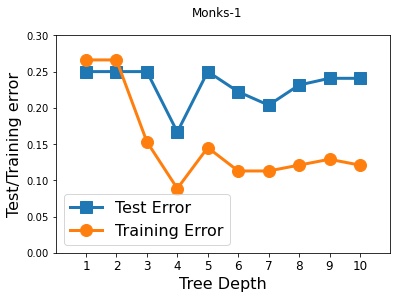

In [494]:
M = np.genfromtxt('./monks-1.train', missing_values=0, skip_header=0, delimiter=',', dtype=int)
ytrn = M[:, 0]
Xtrn = M[:, 1:]

# Load the test data
M = np.genfromtxt('./monks-1.test', missing_values=0, skip_header=0, delimiter=',', dtype=int)
ytst = M[:, 0]
Xtst = M[:, 1:]

testErr = {}
trainErr = {}
for i in range(1,11):
    decision_tree = id3(Xtrn, ytrn, max_depth=i)
    #compute test error
    y_pred = [predict_example(x, decision_tree) for x in Xtst]
    testErr[i] = compute_error(ytst, y_pred)
    #compute training error
    y_pred = [predict_example(x, decision_tree) for x in Xtrn]
    trainErr[i] = compute_error(ytrn, y_pred)
    
#Plot tree depth on the x-axis and test/training errors on the y-axis.
fig = plt.figure()
fig.suptitle("Monks-1")
plt.plot(testErr.keys(), testErr.values(), marker='s', linewidth=3, markersize=12)
plt.plot(trainErr.keys(), trainErr.values(), marker='o', linewidth=3, markersize=12)
plt.xlabel('Tree Depth', fontsize=16)
plt.ylabel('Test/Training error', fontsize=16)
plt.xticks(list(range(1,11)), fontsize=12)
plt.legend(['Test Error', 'Training Error'], fontsize=16)
plt.axis([0, 11, 0, 0.3])
plt.show()

Monks-2 Data Set

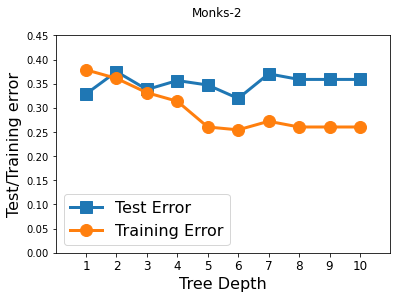

In [495]:
M = np.genfromtxt('./monks-2.train', missing_values=0, skip_header=0, delimiter=',', dtype=int)
ytrn = M[:, 0]
Xtrn = M[:, 1:]

# Load the test data
M = np.genfromtxt('./monks-2.test', missing_values=0, skip_header=0, delimiter=',', dtype=int)
ytst = M[:, 0]
Xtst = M[:, 1:]

testErr = {}
trainErr = {}
for i in range(1,11):
    decision_tree = id3(Xtrn, ytrn, max_depth=i)
    #compute test error
    y_pred = [predict_example(x, decision_tree) for x in Xtst]
    testErr[i] = compute_error(ytst, y_pred)
    #compute training error
    y_pred = [predict_example(x, decision_tree) for x in Xtrn]
    trainErr[i] = compute_error(ytrn, y_pred)
    
#Plot tree depth on the x-axis and test/training errors on the y-axis.
fig = plt.figure()
fig.suptitle("Monks-2")
plt.plot(testErr.keys(), testErr.values(), marker='s', linewidth=3, markersize=12)
plt.plot(trainErr.keys(), trainErr.values(), marker='o', linewidth=3, markersize=12)
plt.xlabel('Tree Depth', fontsize=16)
plt.ylabel('Test/Training error', fontsize=16)
plt.xticks(list(range(1,11)), fontsize=12)
plt.legend(['Test Error', 'Training Error'], fontsize=16)
plt.axis([0, 11, 0, 0.45])
plt.show()

Monks-3 Data Set

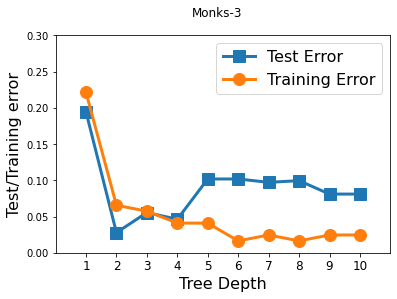

In [496]:
M = np.genfromtxt('./monks-3.train', missing_values=0, skip_header=0, delimiter=',', dtype=int)
ytrn = M[:, 0]
Xtrn = M[:, 1:]

# Load the test data
M = np.genfromtxt('./monks-3.test', missing_values=0, skip_header=0, delimiter=',', dtype=int)
ytst = M[:, 0]
Xtst = M[:, 1:]

testErr = {}
trainErr = {}
for i in range(1,11):
    decision_tree = id3(Xtrn, ytrn, max_depth=i)
    #compute test error
    y_pred = [predict_example(x, decision_tree) for x in Xtst]
    testErr[i] = compute_error(ytst, y_pred)
    #compute training error
    y_pred = [predict_example(x, decision_tree) for x in Xtrn]
    trainErr[i] = compute_error(ytrn, y_pred)
    
#Plot tree depth on the x-axis and test/training errors on the y-axis.
fig = plt.figure()
fig.suptitle("Monks-3")
plt.plot(testErr.keys(), testErr.values(), marker='s', linewidth=3, markersize=12)
plt.plot(trainErr.keys(), trainErr.values(), marker='o', linewidth=3, markersize=12)
plt.xlabel('Tree Depth', fontsize=16)
plt.ylabel('Test/Training error', fontsize=16)
plt.xticks(list(range(1,11)), fontsize=12)
plt.legend(['Test Error', 'Training Error'], fontsize=16)
plt.axis([0, 11, 0, 0.3])
plt.show()

# Part C

In [497]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC

Monks-1

In [498]:
M = np.genfromtxt('./monks-1.train', missing_values=0, skip_header=0, delimiter=',', dtype=int)
ytrn = M[:, 0]
Xtrn = M[:, 1:]

# Load the test data
M = np.genfromtxt('./monks-1.test', missing_values=0, skip_header=0, delimiter=',', dtype=int)
ytst = M[:, 0]
Xtst = M[:, 1:]

Depth = 1

In [532]:
decision_tree_1c = id3(Xtrn, ytrn, max_depth=1)

# Pretty print it to console
pretty_print(decision_tree_1c)

TREE
+-- [SPLIT: x4 = 1 False]
|	+-- [LABEL = 0]
+-- [SPLIT: x4 = 1 True]
|	+-- [LABEL = 1]


In [500]:
y_pred_1c = [predict_example(x, decision_tree_1c) for x in Xtst]
print("Confusion Matrix (Depth = 1):")
print(confusion_matrix(ytst, y_pred_1c))

Confusion Matrix (Depth = 1):
[[216   0]
 [108 108]]


Depth = 3

In [534]:
# Learn a decision tree of depth 3
decision_tree_3c = id3(Xtrn, ytrn, max_depth=3)

# Pretty print it to console
pretty_print(decision_tree_3c)

TREE
+-- [SPLIT: x4 = 1 False]
|	+-- [SPLIT: x0 = 1 False]
|	|	+-- [SPLIT: x1 = 1 False]
|	|	|	+-- [LABEL = 1]
|	|	+-- [SPLIT: x1 = 1 True]
|	|	|	+-- [LABEL = 0]
|	+-- [SPLIT: x0 = 1 True]
|	|	+-- [SPLIT: x1 = 3 False]
|	|	|	+-- [LABEL = 0]
|	|	+-- [SPLIT: x1 = 3 True]
|	|	|	+-- [LABEL = 0]
+-- [SPLIT: x4 = 1 True]
|	+-- [LABEL = 1]


In [502]:
y_pred_3c = [predict_example(x, decision_tree_3c) for x in Xtst]
print("Confusion Matrix (Depth = 3):")
print(confusion_matrix(ytst, y_pred_3c))

Confusion Matrix (Depth = 3):
[[144  72]
 [ 36 180]]


Depth = 5

In [535]:
# Learn a decision tree of depth 5
decision_tree_5c = id3(Xtrn, ytrn, max_depth=5)

# Pretty print it to console
pretty_print(decision_tree_5c)
dot_str = to_graphviz(decision_tree_5c)
render_dot_file(dot_str, './my_learned_tree')

TREE
+-- [SPLIT: x4 = 1 False]
|	+-- [SPLIT: x0 = 1 False]
|	|	+-- [SPLIT: x1 = 1 False]
|	|	|	+-- [SPLIT: x4 = 3 False]
|	|	|	|	+-- [SPLIT: x3 = 1 False]
|	|	|	|	|	+-- [LABEL = 1]
|	|	|	|	+-- [SPLIT: x3 = 1 True]
|	|	|	|	|	+-- [LABEL = 1]
|	|	|	+-- [SPLIT: x4 = 3 True]
|	|	|	|	+-- [SPLIT: x1 = 2 False]
|	|	|	|	|	+-- [LABEL = 0]
|	|	|	|	+-- [SPLIT: x1 = 2 True]
|	|	|	|	|	+-- [LABEL = 1]
|	|	+-- [SPLIT: x1 = 1 True]
|	|	|	+-- [LABEL = 0]
|	+-- [SPLIT: x0 = 1 True]
|	|	+-- [SPLIT: x1 = 3 False]
|	|	|	+-- [SPLIT: x4 = 4 False]
|	|	|	|	+-- [SPLIT: x3 = 2 False]
|	|	|	|	|	+-- [LABEL = 0]
|	|	|	|	+-- [SPLIT: x3 = 2 True]
|	|	|	|	|	+-- [LABEL = 0]
|	|	|	+-- [SPLIT: x4 = 4 True]
|	|	|	|	+-- [SPLIT: x5 = 1 False]
|	|	|	|	|	+-- [LABEL = 0]
|	|	|	|	+-- [SPLIT: x5 = 1 True]
|	|	|	|	|	+-- [LABEL = 0]
|	|	+-- [SPLIT: x1 = 3 True]
|	|	|	+-- [LABEL = 0]
+-- [SPLIT: x4 = 1 True]
|	+-- [LABEL = 1]


In [504]:
y_pred_5c = [predict_example(x, decision_tree_5c) for x in Xtst]
print("Confusion Matrix (Depth = 5):")
print(confusion_matrix(ytst, y_pred_5c))

Confusion Matrix (Depth = 5):
[[156  60]
 [ 48 168]]


Note: It seemed really strange to me at first that the sum of false negatives and false positives was the same for all 3 depths: 1, 3, and 5. However, this is actually consistent with the test error graph in part B for the Monks-1 training set. Indeed, if I set the max-depth to 4 (where the plot shows that the error is less), the sum of the false's goes down to 72 instead of 108.

# Part D

In [505]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.datasets import load_iris

Monks-1 

In [506]:
M = np.genfromtxt('./monks-1.train', missing_values=0, skip_header=0, delimiter=',', dtype=int)
ytrn = M[:, 0]
Xtrn = M[:, 1:]

M = np.genfromtxt('./monks-1.test', missing_values=0, skip_header=0, delimiter=',', dtype=int)
ytst = M[:, 0]
Xtst = M[:, 1:]

Depth = 1

[Text(167.4, 163.07999999999998, 'X[4] <= 1.5\nentropy = 1.0\nsamples = 124\nvalue = [62, 62]'),
 Text(83.7, 54.360000000000014, 'entropy = 0.0\nsamples = 29\nvalue = [0, 29]'),
 Text(251.10000000000002, 54.360000000000014, 'entropy = 0.932\nsamples = 95\nvalue = [62, 33]')]

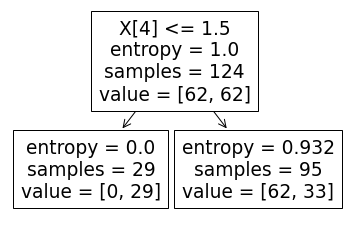

In [507]:
decision_tree_1d = DecisionTreeClassifier(criterion='entropy', max_depth = 1).fit(Xtrn, ytrn)
tree.plot_tree(decision_tree_1d)

In [508]:
y_pred_1d = [decision_tree_1d.predict([x]) for x in Xtst]
print("Confusion Matrix (Depth = 1):")
print(confusion_matrix(ytst, y_pred_1d))

Confusion Matrix (Depth = 1):
[[216   0]
 [108 108]]


Depth = 3

[Text(125.55000000000001, 190.26, 'X[4] <= 1.5\nentropy = 1.0\nsamples = 124\nvalue = [62, 62]'),
 Text(83.7, 135.9, 'entropy = 0.0\nsamples = 29\nvalue = [0, 29]'),
 Text(167.4, 135.9, 'X[0] <= 1.5\nentropy = 0.932\nsamples = 95\nvalue = [62, 33]'),
 Text(83.7, 81.53999999999999, 'X[1] <= 1.5\nentropy = 0.732\nsamples = 39\nvalue = [31, 8]'),
 Text(41.85, 27.180000000000007, 'entropy = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(125.55000000000001, 27.180000000000007, 'entropy = 0.0\nsamples = 31\nvalue = [31, 0]'),
 Text(251.10000000000002, 81.53999999999999, 'X[1] <= 1.5\nentropy = 0.992\nsamples = 56\nvalue = [31, 25]'),
 Text(209.25, 27.180000000000007, 'entropy = 0.0\nsamples = 20\nvalue = [20, 0]'),
 Text(292.95, 27.180000000000007, 'entropy = 0.888\nsamples = 36\nvalue = [11, 25]')]

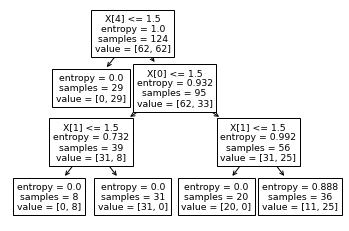

In [509]:
decision_tree_3d = DecisionTreeClassifier(criterion='entropy', max_depth = 3).fit(Xtrn, ytrn)
tree.plot_tree(decision_tree_3d)

In [510]:
y_pred_3d = [decision_tree_3d.predict([x]) for x in Xtst]
print("Confusion Matrix (Depth = 3):")
print(confusion_matrix(ytst, y_pred_3d))

Confusion Matrix (Depth = 3):
[[144  72]
 [  0 216]]


Depth = 5

[Text(91.30909090909091, 199.32, 'X[4] <= 1.5\nentropy = 1.0\nsamples = 124\nvalue = [62, 62]'),
 Text(60.872727272727275, 163.07999999999998, 'entropy = 0.0\nsamples = 29\nvalue = [0, 29]'),
 Text(121.74545454545455, 163.07999999999998, 'X[0] <= 1.5\nentropy = 0.932\nsamples = 95\nvalue = [62, 33]'),
 Text(60.872727272727275, 126.83999999999999, 'X[1] <= 1.5\nentropy = 0.732\nsamples = 39\nvalue = [31, 8]'),
 Text(30.436363636363637, 90.6, 'entropy = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(91.30909090909091, 90.6, 'entropy = 0.0\nsamples = 31\nvalue = [31, 0]'),
 Text(182.61818181818182, 126.83999999999999, 'X[1] <= 1.5\nentropy = 0.992\nsamples = 56\nvalue = [31, 25]'),
 Text(152.1818181818182, 90.6, 'entropy = 0.0\nsamples = 20\nvalue = [20, 0]'),
 Text(213.05454545454546, 90.6, 'X[3] <= 1.5\nentropy = 0.888\nsamples = 36\nvalue = [11, 25]'),
 Text(152.1818181818182, 54.359999999999985, 'X[5] <= 1.5\nentropy = 0.75\nsamples = 14\nvalue = [3, 11]'),
 Text(121.74545454545455, 18.119

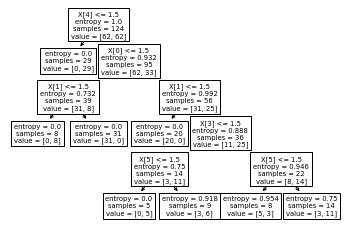

In [511]:
decision_tree_5d = DecisionTreeClassifier(criterion='entropy', max_depth = 5).fit(Xtrn, ytrn)
tree.plot_tree(decision_tree_5d)

In [512]:
y_pred_5d = [decision_tree_5d.predict([x]) for x in Xtst]
print("Confusion Matrix (Depth = 5):")
print(confusion_matrix(ytst, y_pred_5d))

Confusion Matrix (Depth = 5):
[[168  48]
 [ 24 192]]


# Part E

In [513]:
M = np.genfromtxt('./part_E_Dataset.txt', missing_values=0, skip_header=0)

In [514]:
#We want to find the mean of each attribute, not of all the attributes mushed together
trpose = np.transpose(M)
Mat = []
for row in trpose:
    mean = np.mean(row)
    temp = []
    for point in row:
        if (point <= mean):
             temp.append(0)
        else:
             temp.append(1)
    Mat.append(temp)
Mat = np.asarray(np.transpose(Mat))
np.random.shuffle(Mat)

In [515]:
#5000 rows in M
ytrn = Mat[:3751, 0] #75% of dataset
Xtrn = Mat[:3751, 1:]

ytst = Mat[3751:, 0]
Xtst = Mat[3751:, 1:]
np.unique(ytst)

array([0, 1])

# Repeat Part C with my own Data Set

Depth = 1

In [516]:
decision_tree_1ec = id3(Xtrn, ytrn, max_depth=1)

# Pretty print it to console
pretty_print(decision_tree_1ec)

TREE
+-- [SPLIT: x2 = 0 False]
|	+-- [LABEL = 1]
+-- [SPLIT: x2 = 0 True]
|	+-- [LABEL = 0]


In [517]:
y_pred_1ec = [predict_example(x, decision_tree_1ec) for x in Xtst]
print("Confusion Matrix (Depth = 1):")
print(confusion_matrix(ytst, y_pred_1ec))

Confusion Matrix (Depth = 1):
[[668  16]
 [  0 565]]


Depth = 3

In [518]:
decision_tree_3ec = id3(Xtrn, ytrn, max_depth=3)

# Pretty print it to console
pretty_print(decision_tree_3ec)

TREE
+-- [SPLIT: x2 = 0 False]
|	+-- [SPLIT: x4 = 0 False]
|	|	+-- [LABEL = 1]
|	+-- [SPLIT: x4 = 0 True]
|	|	+-- [SPLIT: x3 = 0 False]
|	|	|	+-- [LABEL = 1]
|	|	+-- [SPLIT: x3 = 0 True]
|	|	|	+-- [LABEL = 0]
+-- [SPLIT: x2 = 0 True]
|	+-- [LABEL = 0]


In [519]:
y_pred_3ec = [predict_example(x, decision_tree_3ec) for x in Xtst]
print("Confusion Matrix (Depth = 3):")
print(confusion_matrix(ytst, y_pred_3ec))

Confusion Matrix (Depth = 3):
[[684   0]
 [  6 559]]


Depth = 5

In [520]:
decision_tree_5ec = id3(Xtrn, ytrn, max_depth=5)

# Pretty print it to console
pretty_print(decision_tree_5ec)

TREE
+-- [SPLIT: x2 = 0 False]
|	+-- [SPLIT: x4 = 0 False]
|	|	+-- [LABEL = 1]
|	+-- [SPLIT: x4 = 0 True]
|	|	+-- [SPLIT: x3 = 0 False]
|	|	|	+-- [LABEL = 1]
|	|	+-- [SPLIT: x3 = 0 True]
|	|	|	+-- [SPLIT: x0 = 0 False]
|	|	|	|	+-- [SPLIT: x0 = 1 False]
|	|	|	|	|	+-- [LABEL = 0]
|	|	|	|	+-- [SPLIT: x0 = 1 True]
|	|	|	|	|	+-- [LABEL = 0]
|	|	|	+-- [SPLIT: x0 = 0 True]
|	|	|	|	+-- [SPLIT: x1 = 1 False]
|	|	|	|	|	+-- [LABEL = 0]
|	|	|	|	+-- [SPLIT: x1 = 1 True]
|	|	|	|	|	+-- [LABEL = 0]
+-- [SPLIT: x2 = 0 True]
|	+-- [LABEL = 0]


In [521]:
y_pred_5ec = [predict_example(x, decision_tree_5ec) for x in Xtst]
print("Confusion Matrix (Depth = 5):")
print(confusion_matrix(ytst, y_pred_5ec))

Confusion Matrix (Depth = 5):
[[684   0]
 [  6 559]]


# Repeat Part D with my own Data Set

Depth = 1

[Text(167.4, 163.07999999999998, 'X[2] <= 0.5\nentropy = 0.999\nsamples = 3751\nvalue = [1932, 1819]'),
 Text(83.7, 54.360000000000014, 'entropy = 0.0\nsamples = 1898\nvalue = [1898, 0]'),
 Text(251.10000000000002, 54.360000000000014, 'entropy = 0.132\nsamples = 1853\nvalue = [34, 1819]')]

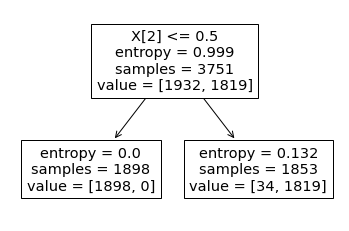

In [522]:
decision_tree_1ed = DecisionTreeClassifier(criterion='entropy', max_depth = 1).fit(Xtrn, ytrn)
tree.plot_tree(decision_tree_1ed)

In [523]:
y_pred_1ed = [decision_tree_1ed.predict([x]) for x in Xtst]
print("Confusion Matrix (Depth = 1):")
print(confusion_matrix(ytst, y_pred_1ed))

Confusion Matrix (Depth = 1):
[[668  16]
 [  0 565]]


Depth = 3

[Text(133.92000000000002, 190.26, 'X[2] <= 0.5\nentropy = 0.999\nsamples = 3751\nvalue = [1932, 1819]'),
 Text(66.96000000000001, 135.9, 'entropy = 0.0\nsamples = 1898\nvalue = [1898, 0]'),
 Text(200.88000000000002, 135.9, 'X[4] <= 0.5\nentropy = 0.132\nsamples = 1853\nvalue = [34, 1819]'),
 Text(133.92000000000002, 81.53999999999999, 'X[3] <= 0.5\nentropy = 0.886\nsamples = 112\nvalue = [34, 78]'),
 Text(66.96000000000001, 27.180000000000007, 'entropy = 0.941\nsamples = 53\nvalue = [34, 19]'),
 Text(200.88000000000002, 27.180000000000007, 'entropy = 0.0\nsamples = 59\nvalue = [0, 59]'),
 Text(267.84000000000003, 81.53999999999999, 'entropy = 0.0\nsamples = 1741\nvalue = [0, 1741]')]

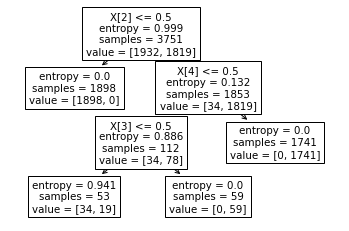

In [524]:
decision_tree_3ed = DecisionTreeClassifier(criterion='entropy', max_depth = 3).fit(Xtrn, ytrn)
tree.plot_tree(decision_tree_3ed)

In [525]:
y_pred_3ed = [decision_tree_1ed.predict([x]) for x in Xtst]
print("Confusion Matrix (Depth = 3):")
print(confusion_matrix(ytst, y_pred_3ed))

Confusion Matrix (Depth = 3):
[[668  16]
 [  0 565]]


Depth = 5

[Text(167.4, 195.696, 'X[2] <= 0.5\nentropy = 0.999\nsamples = 3751\nvalue = [1932, 1819]'),
 Text(111.60000000000001, 152.208, 'entropy = 0.0\nsamples = 1898\nvalue = [1898, 0]'),
 Text(223.20000000000002, 152.208, 'X[4] <= 0.5\nentropy = 0.132\nsamples = 1853\nvalue = [34, 1819]'),
 Text(167.4, 108.72, 'X[3] <= 0.5\nentropy = 0.886\nsamples = 112\nvalue = [34, 78]'),
 Text(111.60000000000001, 65.232, 'X[6] <= 0.5\nentropy = 0.941\nsamples = 53\nvalue = [34, 19]'),
 Text(55.800000000000004, 21.744, 'entropy = 0.764\nsamples = 27\nvalue = [21, 6]'),
 Text(167.4, 21.744, 'entropy = 1.0\nsamples = 26\nvalue = [13, 13]'),
 Text(223.20000000000002, 65.232, 'entropy = 0.0\nsamples = 59\nvalue = [0, 59]'),
 Text(279.0, 108.72, 'entropy = 0.0\nsamples = 1741\nvalue = [0, 1741]')]

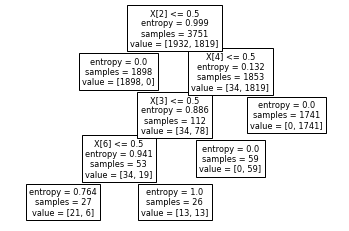

In [526]:
decision_tree_5ed = DecisionTreeClassifier(criterion='entropy', max_depth = 5).fit(Xtrn, ytrn)
tree.plot_tree(decision_tree_5ed)

In [527]:
y_pred_5ed = [decision_tree_1ed.predict([x]) for x in Xtst]
print("Confusion Matrix (Depth = 5):")
print(confusion_matrix(ytst, y_pred_5ed))

Confusion Matrix (Depth = 5):
[[668  16]
 [  0 565]]


# Discussion: My Implementation vs Scikit-Learn Implementation

The first, obvious, thing to note is that it is much more time efficient to use the scikit-learn implementation for decision trees rather than implementing it individually. In terms of accuracy, it seems that both implementations are around equal. Looking at the confusion matrices, our id3 implementation did slightly worse than the scikit implementation when it came to the monks sets. However, it did slightly better than the scikit implementation when it came to my own data set in part E. This makes sense, as we specifically used entropy as the criterion to make the scikit decision tree, so the details of the implementation are likely pretty similar. Because the data I chose had 10 different attributes, it is more likely to be accurate because there are more attribute-value pairs to choose a possible higher information gain from. This would help explain the accuracy shown by the confusion matrices in part E